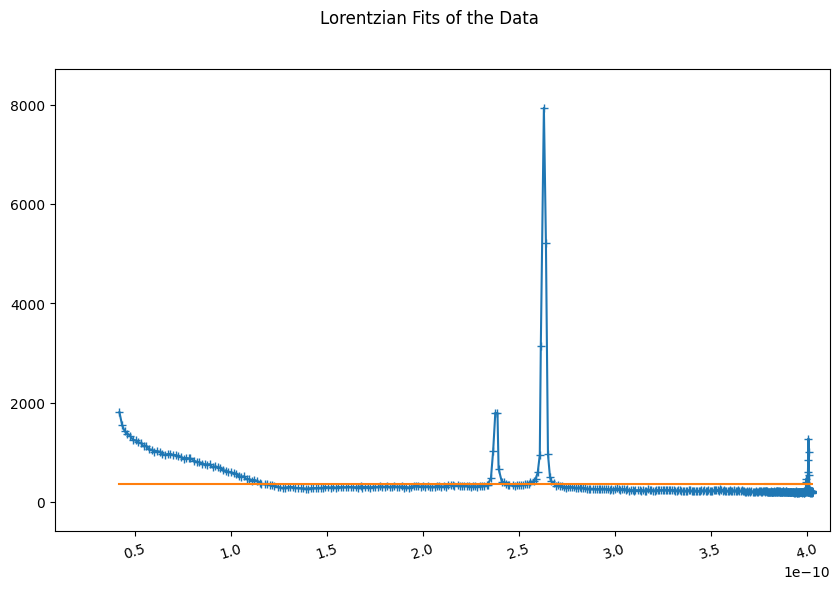

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def unpack(file_path):

    x = []
    x_title = ""
    y = []
    y_title = ""

    with open(file_path, 'r', encoding='iso-8859-1') as file:
        for line in file:
            # Process each line here
            line = line.strip()
            if line == "":
                continue
            line = line.split()
            if ord(line[0][-1]) > 57:
                x_title += line[0] + " "
                y_title += line[1] + " "
                continue
            line[0] = line[0].replace(",", ".")
            line[1] = line[1].replace(",", ".")
            x.append(float(line[0]))
            y.append(float(line[1]))
    
    return x, x_title, y, y_title

file_path = "datos1(dia1)"

x,x_title,y,y_title = unpack(file_path)
xf = []
for i in range(len(x)):
    xf.append(x[i]/(2))
    
xf_rad = []
for i in range(len(x)):
    xf_rad.append(x[i]*(np.pi/180))
    
def Bragg(theta,n,d):
    wavelength = (2*d*np.sin(theta)/n)
    return wavelength

def mu(wave,Z,k):
    mu = 1*k*(wave**3)*(Z**3)
    return mu
    
def I(mu,I_0):
    I = I_0*np.exp(-mu*d)
    return I

k = 1
d = 2.014*(10**(-10))
n1 = 1
n2 = 2
Z = 29

x_Bragg1 = Bragg(xf_rad,n1,d)
mu1 = mu(x_Bragg1,Z,k)
I1 = I(mu1,y)

x_Bragg2 = Bragg(xf_rad,n2,d)
"""
# subtract the background
def bg_subtract(x, y):
    m = (y[-1] - y[0])/(x[-1] - x[0])
    return y - (m*(x - x[0]) + y[0])

I1 = bg_subtract(x_Bragg1, I1)
"""

# Fitting the data
# Lorentzian fitting function
def lorentz(x, *p):
    I, gamma, x0 = p
    return I * gamma**2 / ((x - x0)**2 + gamma**2)

# initial parameter guesses
# [height, HWHM, shift]
p = np.array([7939, 2.4, 5.4], dtype=np.double)  

def fit(p, x, y):
    return curve_fit(lorentz, x, y, p0 = p)

# Get the fitting parameters for the best lorentzian
solp1, ier1 = fit(p, x_Bragg1, I1)

# error stuff
# coefficient of determination
def calc_r2(y, f):
    avg_y = y.mean()
    sstot = ((y - avg_y)**2).sum()
    ssres = ((y - f)**2).sum()
    return 1 - ssres/sstot

# calculate the errors
r2_1 = calc_r2(I1, lorentz(x_Bragg1, *solp1))
# plotting
def set_lim(x, y):
    plt.xlim([x[0] - (x[-1] - x[0])*.1, x[-1] + (x[-1] - x[0])*.1])
    plt.ylim([y.min() - (y.max() - y.min())*.1, y.max() + (y.max() - y.min())*.1])

# plot data
plt.figure(figsize=(10,6))
plt.plot(x_Bragg1, I1, marker='+')
# plot lorentzian fit
plt.plot(x_Bragg1, lorentz(x_Bragg1, *solp1))
plt.xticks(rotation=17)
set_lim(x_Bragg1, I1)
plt.title('')
amp, gamma, x0 = solp1[0], solp1[1], solp1[2]
equation = "$I = %.3g $\n$ \gamma = %.3g $\n$ x_0 = %.3g $\n$ r^2 = %.3g$" % (amp, gamma, x0, r2_1)
plt.annotate(equation, xy=(5.2, 0.23), fontsize=13)

plt.suptitle('Lorentzian Fits of the Data')

plt.show()